In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Check and get current working directory
import os
print(os.getcwd())

/content


In [3]:
# Connecting to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Extract dataset from google drive
dataset = ('/content/drive/MyDrive/MyDataSet/fmcg_regional_sales_data.xlsx')
df = pd.read_excel(dataset)

In [5]:
df.head()

,Product Name,Sales Volume,Units Returned,Competitor Promotions,Distributor Availability,Shelf Placement,Customer Complaints,Date,Store ID,Salesperson ID,Promotional Discount (%),Weather Condition
0,Shampoo,148,38,High,Available,Eye Level,Late delivery,2024-12-17,STR-125,SP-854,15,Cloudy
1,Beverage,1151,233,High,Available,Bottom Shelf,Damaged product,2024-03-02,STR-859,SP-692,15,Rainy
2,Chips,3026,172,Low,Available,Bottom Shelf,Poor packaging,2024-08-30,STR-381,SP-710,15,Sunny
3,Beverage,2490,22,NaN,Limited,Top Shelf,Damaged product,2025-06-15,STR-350,SP-848,15,Sunny
4,Cereal,4036,2,NaN,Available,End Cap,NaN,2024-08-15,STR-328,SP-667,20,Sunny


In [6]:
df.shape

(12000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Product Name              12000 non-null  object        
 1   Sales Volume              12000 non-null  int64         
 2   Units Returned            12000 non-null  int64         
 3   Competitor Promotions     8933 non-null   object        
 4   Distributor Availability  12000 non-null  object        
 5   Shelf Placement           12000 non-null  object        
 6   Customer Complaints       9594 non-null   object        
 7   Date                      12000 non-null  datetime64[ns]
 8   Store ID                  12000 non-null  object        
 9   Salesperson ID            12000 non-null  object        
 10  Promotional Discount (%)  12000 non-null  int64         
 11  Weather Condition         12000 non-null  object        
dtypes: datetime64[ns](

In [8]:
df.isnull().sum()

,0
Product Name,0
Sales Volume,0
Units Returned,0
Competitor Promotions,3067
Distributor Availability,0
Shelf Placement,0
Customer Complaints,2406
Date,0
Store ID,0
Salesperson ID,0


In [9]:
Ret_Rate = df['Units Returned'] / df['Sales Volume']
df['Return Rate'] = Ret_Rate.round(2) * 100

In [10]:
df.head()

,Product Name,Sales Volume,Units Returned,Competitor Promotions,Distributor Availability,Shelf Placement,Customer Complaints,Date,Store ID,Salesperson ID,Promotional Discount (%),Weather Condition,Return Rate
0,Shampoo,148,38,High,Available,Eye Level,Late delivery,2024-12-17,STR-125,SP-854,15,Cloudy,26.0
1,Beverage,1151,233,High,Available,Bottom Shelf,Damaged product,2024-03-02,STR-859,SP-692,15,Rainy,20.0
2,Chips,3026,172,Low,Available,Bottom Shelf,Poor packaging,2024-08-30,STR-381,SP-710,15,Sunny,6.0
3,Beverage,2490,22,NaN,Limited,Top Shelf,Damaged product,2025-06-15,STR-350,SP-848,15,Sunny,1.0
4,Cereal,4036,2,NaN,Available,End Cap,NaN,2024-08-15,STR-328,SP-667,20,Sunny,0.0


In [11]:
df.isnull().sum()

,0
Product Name,0
Sales Volume,0
Units Returned,0
Competitor Promotions,3067
Distributor Availability,0
Shelf Placement,0
Customer Complaints,2406
Date,0
Store ID,0
Salesperson ID,0


In [12]:
df.shape

(12000, 13)

In [13]:
df.isnull().sum()

,0
Product Name,0
Sales Volume,0
Units Returned,0
Competitor Promotions,3067
Distributor Availability,0
Shelf Placement,0
Customer Complaints,2406
Date,0
Store ID,0
Salesperson ID,0


In [14]:
df['Competitor Promotions']

,Competitor Promotions
0,High
1,High
2,Low
3,NaN
4,NaN
...,...
11995,NaN
11996,Low
11997,Low
11998,NaN


In [15]:
High_occur = df['Competitor Promotions'].mode()

In [16]:
df['Competitor Promotions'].fillna(High_occur[0], inplace=True)

In [17]:
df.isnull().sum()

,0
Product Name,0
Sales Volume,0
Units Returned,0
Competitor Promotions,0
Distributor Availability,0
Shelf Placement,0
Customer Complaints,2406
Date,0
Store ID,0
Salesperson ID,0


In [18]:
df['Customer Complaints']

,Customer Complaints
0,Late delivery
1,Damaged product
2,Poor packaging
3,Damaged product
4,NaN
...,...
11995,Wrong item
11996,Damaged product
11997,Wrong item
11998,Late delivery


In [19]:
print(df['Customer Complaints'].value_counts())

Customer Complaints
Poor packaging     2442
Wrong item         2404
Damaged product    2385
Late delivery      2363
Name: count, dtype: int64


In [20]:
df['Customer Complaints'].fillna('No Complaint', inplace=True)

In [21]:
df.isnull().sum()

,0
Product Name,0
Sales Volume,0
Units Returned,0
Competitor Promotions,0
Distributor Availability,0
Shelf Placement,0
Customer Complaints,0
Date,0
Store ID,0
Salesperson ID,0


In [22]:
df.head()

,Product Name,Sales Volume,Units Returned,Competitor Promotions,Distributor Availability,Shelf Placement,Customer Complaints,Date,Store ID,Salesperson ID,Promotional Discount (%),Weather Condition,Return Rate
0,Shampoo,148,38,High,Available,Eye Level,Late delivery,2024-12-17,STR-125,SP-854,15,Cloudy,26.0
1,Beverage,1151,233,High,Available,Bottom Shelf,Damaged product,2024-03-02,STR-859,SP-692,15,Rainy,20.0
2,Chips,3026,172,Low,Available,Bottom Shelf,Poor packaging,2024-08-30,STR-381,SP-710,15,Sunny,6.0
3,Beverage,2490,22,Medium,Limited,Top Shelf,Damaged product,2025-06-15,STR-350,SP-848,15,Sunny,1.0
4,Cereal,4036,2,Medium,Available,End Cap,No Complaint,2024-08-15,STR-328,SP-667,20,Sunny,0.0


In [23]:
df.groupby(df['Distributor Availability']).count()

,Product Name,Sales Volume,Units Returned,Competitor Promotions,Shelf Placement,Customer Complaints,Date,Store ID,Salesperson ID,Promotional Discount (%),Weather Condition,Return Rate
Distributor Availability,,,,,,,,,,,,
Available,4026,4026,4026,4026,4026,4026,4026,4026,4026,4026,4026,4026
Limited,4012,4012,4012,4012,4012,4012,4012,4012,4012,4012,4012,4012
Out of Stock,3962,3962,3962,3962,3962,3962,3962,3962,3962,3962,3962,3962


<Axes: >

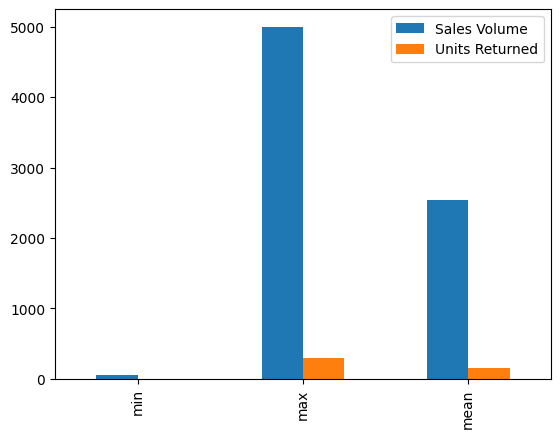

In [24]:
df[['Sales Volume','Units Returned']].agg(['min', 'max', 'mean']).plot(kind='bar')

In [25]:
df['Customer Complaints'].value_counts()

,count
Customer Complaints,
Poor packaging,2442
No Complaint,2406
Wrong item,2404
Damaged product,2385
Late delivery,2363


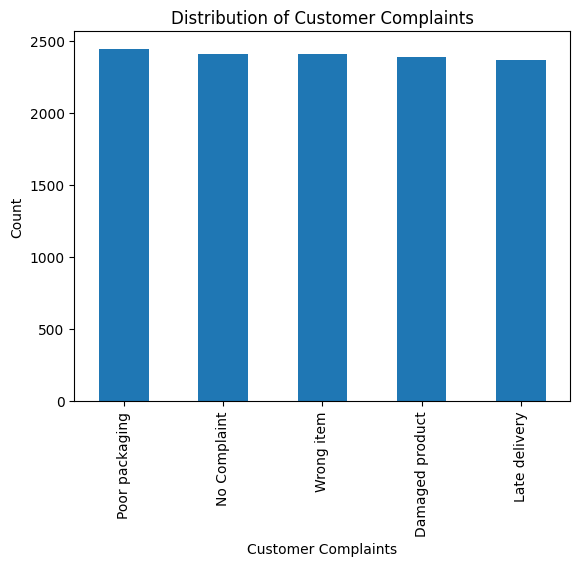

In [26]:
df['Customer Complaints'].value_counts().plot(kind='bar')
plt.xlabel('Customer Complaints')
plt.ylabel('Count')
plt.title('Distribution of Customer Complaints')
plt.show()

In [27]:
df.head()

,Product Name,Sales Volume,Units Returned,Competitor Promotions,Distributor Availability,Shelf Placement,Customer Complaints,Date,Store ID,Salesperson ID,Promotional Discount (%),Weather Condition,Return Rate
0,Shampoo,148,38,High,Available,Eye Level,Late delivery,2024-12-17,STR-125,SP-854,15,Cloudy,26.0
1,Beverage,1151,233,High,Available,Bottom Shelf,Damaged product,2024-03-02,STR-859,SP-692,15,Rainy,20.0
2,Chips,3026,172,Low,Available,Bottom Shelf,Poor packaging,2024-08-30,STR-381,SP-710,15,Sunny,6.0
3,Beverage,2490,22,Medium,Limited,Top Shelf,Damaged product,2025-06-15,STR-350,SP-848,15,Sunny,1.0
4,Cereal,4036,2,Medium,Available,End Cap,No Complaint,2024-08-15,STR-328,SP-667,20,Sunny,0.0


Text(0.5, 1.0, 'Distribution of Competitor Promotions')

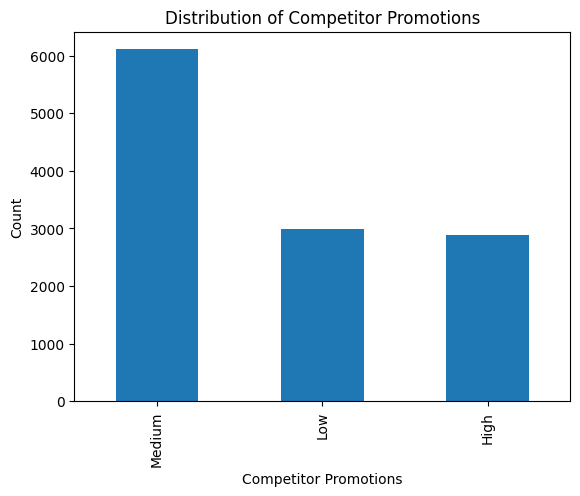

In [28]:
df['Competitor Promotions'].value_counts().plot(kind = 'bar')
plt.xlabel('Competitor Promotions')
plt.ylabel('Count')
plt.title('Distribution of Competitor Promotions')

In [29]:
df.head()

,Product Name,Sales Volume,Units Returned,Competitor Promotions,Distributor Availability,Shelf Placement,Customer Complaints,Date,Store ID,Salesperson ID,Promotional Discount (%),Weather Condition,Return Rate
0,Shampoo,148,38,High,Available,Eye Level,Late delivery,2024-12-17,STR-125,SP-854,15,Cloudy,26.0
1,Beverage,1151,233,High,Available,Bottom Shelf,Damaged product,2024-03-02,STR-859,SP-692,15,Rainy,20.0
2,Chips,3026,172,Low,Available,Bottom Shelf,Poor packaging,2024-08-30,STR-381,SP-710,15,Sunny,6.0
3,Beverage,2490,22,Medium,Limited,Top Shelf,Damaged product,2025-06-15,STR-350,SP-848,15,Sunny,1.0
4,Cereal,4036,2,Medium,Available,End Cap,No Complaint,2024-08-15,STR-328,SP-667,20,Sunny,0.0


In [30]:
df.groupby(df['Product Name'])

In [31]:
df['Product Name'].groupby(df['Product Name']).count()

,Product Name
Product Name,
Beverage,1520
Biscuits,1518
Cereal,1477
Chips,1526
Detergent,1449
Shampoo,1505
Soap,1459
Toothpaste,1546


In [32]:

# The lambda function there is to format the sales volume well formatted with comma
df['Sales Volume'].groupby(df['Product Name']).sum().sort_values(ascending=False).apply(lambda x: f'{x:,}')

,Sales Volume
Product Name,
Toothpaste,"3,992,072"
Biscuits,"3,878,427"
Chips,"3,848,914"
Shampoo,"3,809,427"
Beverage,"3,799,650"
Soap,"3,785,260"
Cereal,"3,727,198"
Detergent,"3,693,283"


In [33]:
df['Units Returned'].groupby(df['Product Name']).sum().sort_values(ascending=False).apply(lambda x: f'{x:,}')

,Units Returned
Product Name,
Toothpaste,"232,479"
Chips,"230,755"
Beverage,"228,852"
Biscuits,"225,129"
Shampoo,"223,483"
Cereal,"221,176"
Soap,"220,172"
Detergent,"218,224"


In [34]:
df['Sales Volume'].groupby(df['Store ID']).sum().sort_values(ascending=False).apply(lambda x: f'{x:,}').head(10)

,Sales Volume
Store ID,
STR-402,"71,211"
STR-564,"67,690"
STR-762,"66,900"
STR-810,"66,612"
STR-838,"65,169"
STR-279,"64,085"
STR-155,"62,502"
STR-252,"62,446"
STR-180,"61,635"
